Gbadegesin Obaloluwa David
QUIZ 3


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("Data_for_UCI_named.csv")

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


Data preprocessing



In [6]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [7]:
df.nunique()

tau1     10000
tau2     10000
tau3     10000
tau4     10000
p1       10000
p2       10000
p3       10000
p4       10000
g1       10000
g2       10000
g3       10000
g4       10000
stab     10000
stabf        2
dtype: int64

In [8]:
#dropping stab column
df.drop(["stab"], axis=1, inplace=True)

In [9]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stabf   10000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1015.8+ KB


Encoding ordinal categorical features as an integer array

In [11]:
ordinal_categoricals = ["stabf"]

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [13]:
df[ordinal_categoricals]=enc.fit_transform(df[ordinal_categoricals])

In [14]:
df.head()
#unstable is there 1.0
#stable is therefore 0.0

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,1.0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,0.0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,1.0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,1.0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,1.0


In [15]:
enc.categories_

[array(['stable', 'unstable'], dtype=object)]

Scaling the features

In [16]:
#let us look at target variable proportions:
pd.crosstab(df["stabf"],df["stabf"], normalize="all")*100

#the target variable looks relatively balanced

stabf,0.0,1.0
stabf,,
0.0,36.2,0.0
1.0,0.0,63.8


Splitting the data

In [17]:
#firstly, let us standardize our dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)
df_sc=pd.DataFrame(df_sc,columns=df.columns)
df_sc["stabf"]=df["stabf"]

In [18]:
df_sc.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026,1.0
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256,0.0
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802,1.0
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750,1.0
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063,1.0


In [19]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [20]:
y = df_sc["stabf"]
X = df_sc.drop("stabf", axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
log_reg.fit(X_train,y_train)
#Preddicting the test set prob and classess
y_hat_log=log_reg.predict(X_test)
y_hat_probs1=log_reg.predict_proba(X_test)

In [22]:
np.round(log_reg.predict_proba(X_test),3)

array([[0.037, 0.963],
       [0.184, 0.816],
       [0.863, 0.137],
       ...,
       [0.458, 0.542],
       [0.398, 0.602],
       [0.036, 0.964]])

In [23]:
np.max(y_hat_probs1)

0.9997563262605842

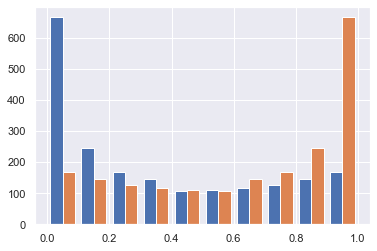

In [24]:
plt.hist(y_hat_probs1)
plt.show()

In [25]:
# Performance metrics:

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

Confusion matrix

In [27]:
print(confusion_matrix(y_test, y_hat_log))

[[ 494  218]
 [ 174 1114]]


In [28]:
print(classification_report(y_test,y_hat_log))

              precision    recall  f1-score   support

         0.0       0.74      0.69      0.72       712
         1.0       0.84      0.86      0.85      1288

    accuracy                           0.80      2000
   macro avg       0.79      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



ROC and AUC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


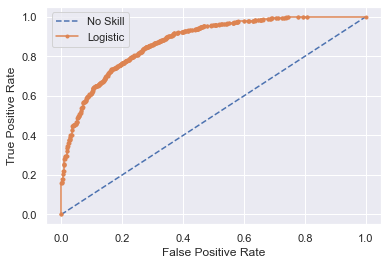

In [29]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0.5 for i in range(len(y_test))]
lr_probs = log_reg.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#AUC for logistic regression is 0.876

Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [31]:
f1=cross_val_score(estimator=log_reg, X=X_train, y=y_train,cv=5,scoring="f1")

In [32]:
f1

array([0.86452848, 0.86463298, 0.86525505, 0.85891918, 0.84548105])

In [33]:
f1_cv=round(f1.mean(),2)
f1_cv

0.86

ROC AND AUC CROSS VALIDATED LOG REG

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


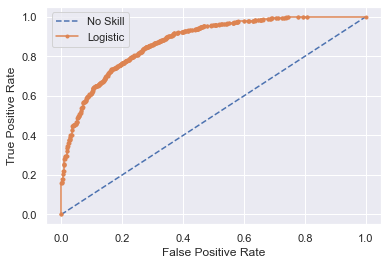

In [34]:
# generate a no skill (ns) prediction and logistic regression (lr) predictions.
ns_probs = [0.5 for i in range(len(y_test))]
lr_probs = log_reg.predict_proba(X_test)[:,1]
# calculating scores for no skill and logistic regression
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
#Fitting RF classifier to the training set

RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
#Predicting the test set probabilities and classess
y_hat = RF_classifier.predict(X_test)
y_hat_probs = RF_classifier.predict_proba(X_test)

In [38]:
y_hat_probs

array([[0.09, 0.91],
       [0.06, 0.94],
       [0.75, 0.25],
       ...,
       [0.78, 0.22],
       [0.35, 0.65],
       [0.23, 0.77]])

In [39]:
df_predictions=pd.DataFrame({"y_hat":y_hat,"y_test":y_test})

In [40]:
df_predictions

,y_hat,y_test
9953,1.0,1.0
3850,1.0,1.0
4962,0.0,0.0
3886,0.0,0.0
5437,1.0,1.0
...,...,...
3919,1.0,0.0
162,0.0,0.0
7903,0.0,0.0
2242,1.0,1.0


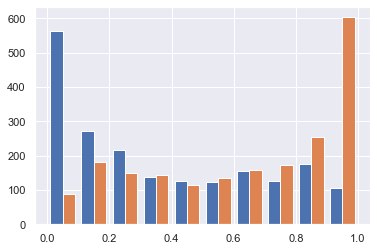

In [41]:
plt.hist(y_hat_probs)
plt.show()

Evaluating the model performance on test data

In [42]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import confusion_matrix, classification_report,roc_curve,roc_auc_score

Confusion matrix

In [43]:
print(confusion_matrix(y_test,y_hat))

[[ 622   90]
 [  62 1226]]


In [58]:
round(print(classification_report(y_test,y_hat)),4)

              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89       712
         1.0       0.93      0.95      0.94      1288

    accuracy                           0.92      2000
   macro avg       0.92      0.91      0.92      2000
weighted avg       0.92      0.92      0.92      2000



TypeError: type NoneType doesn't define __round__ method

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
clf=ExtraTreesClassifier(n_estimators=100, random_state=1,n_jobs=-1,verbose=1,cv=5,scoring="accuracy")

TypeError: __init__() got an unexpected keyword argument 'cv'

Boosting the classification

In [49]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [50]:
#fitting adboost classifier to the training set
AdB_classifier = AdaBoostClassifier(random_state=1)
AdB_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [52]:
#fitting gradient boosting classifier to the training set
GBM_classifier = GradientBoostingClassifier(random_state=1, learning_rate=0.1,max_depth=6)
GBM_classifier.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=6, random_state=1)

In [ ]:
#fitting lightgbm classifier to the training set
RF_classifier= RandomForestClassifier(random_state=1)
RF_classifier.fit(X_train,y_train)

In [53]:
#predicitng the test set probablities and class
y_hat_AdB = AdB_classifier.predict(X_test)
y_hat_GBM = GBM_classifier.predict(X_test)

In [54]:
#couldnt install xgboost and lightgbm

Evaluating the model performance on test data

In [55]:
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

COMPARING ACCURACY AND F1SCORES AMONG THE boosters anf RF

In [57]:
print('RF  Accuracy = {}'.format(accuracy_score(y_test, y_hat)))
print('AdB Accuracy = {}'.format(accuracy_score(y_test, y_hat_AdB)))
print('GBM Accuracy = {}'.format(accuracy_score(y_test, y_hat_GBM)))


RF  Accuracy = 0.924
AdB Accuracy = 0.8425
GBM Accuracy = 0.938
